# Lab work №1

### Dependence of absolute error on the methond of calculation derivative 

##### Goncharov Mark Б01-908

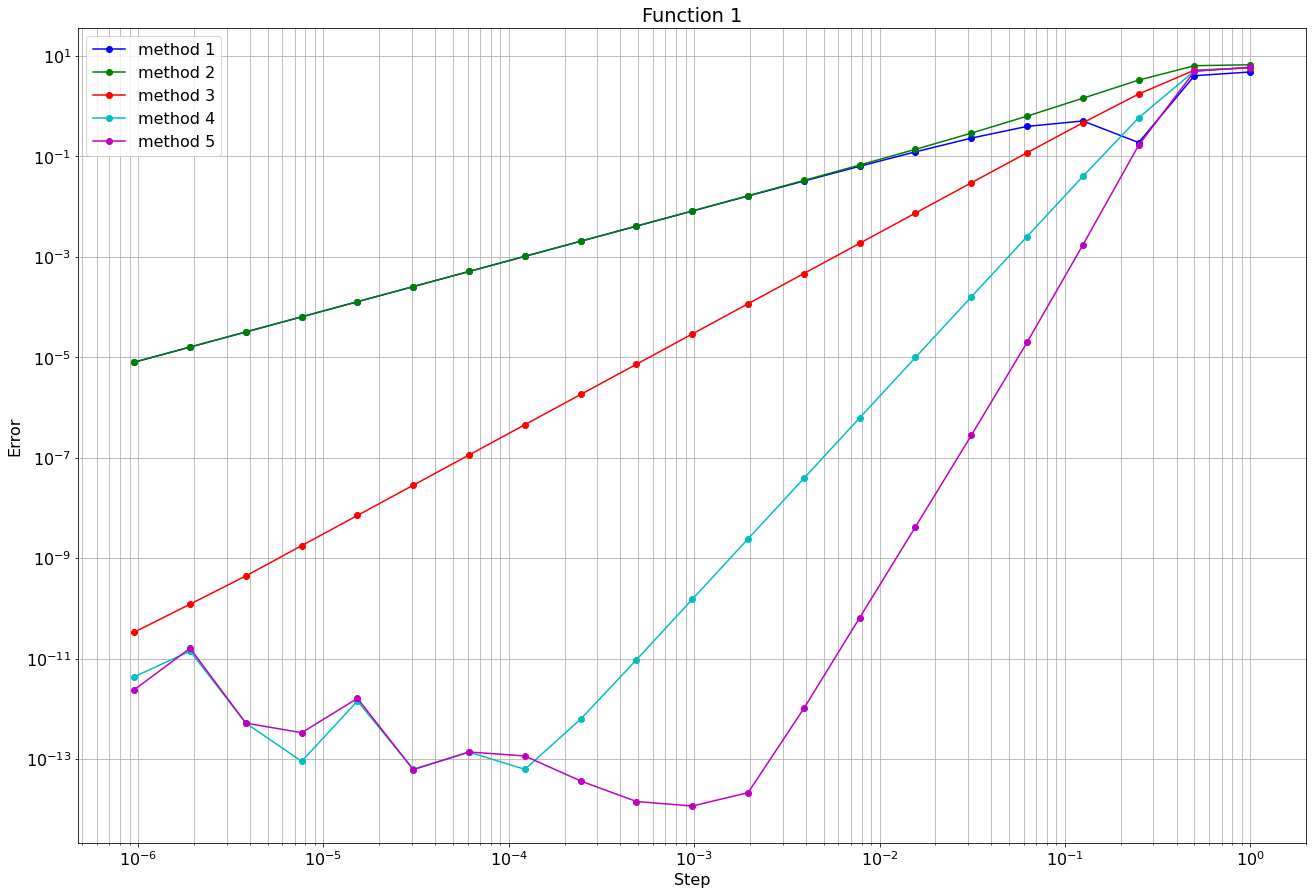

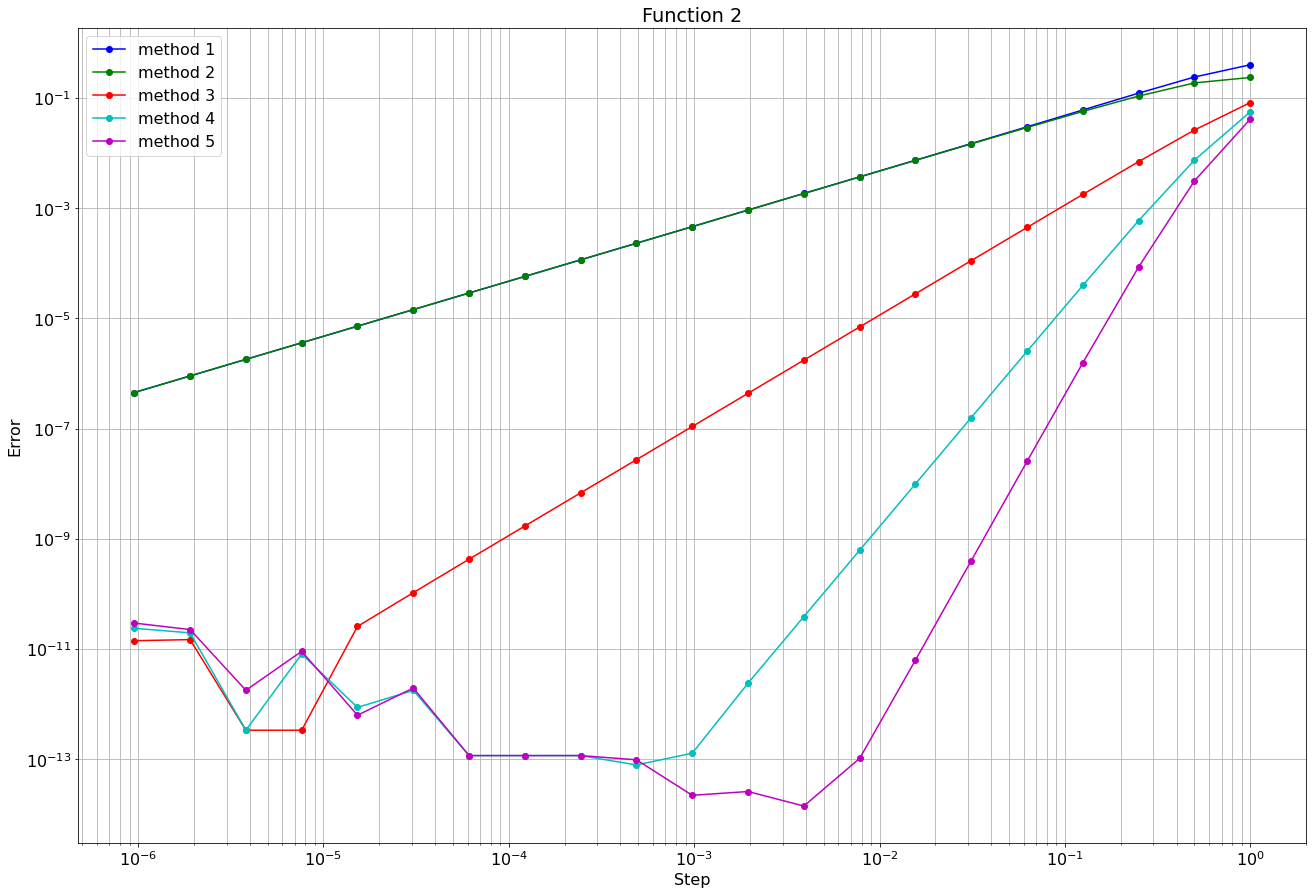

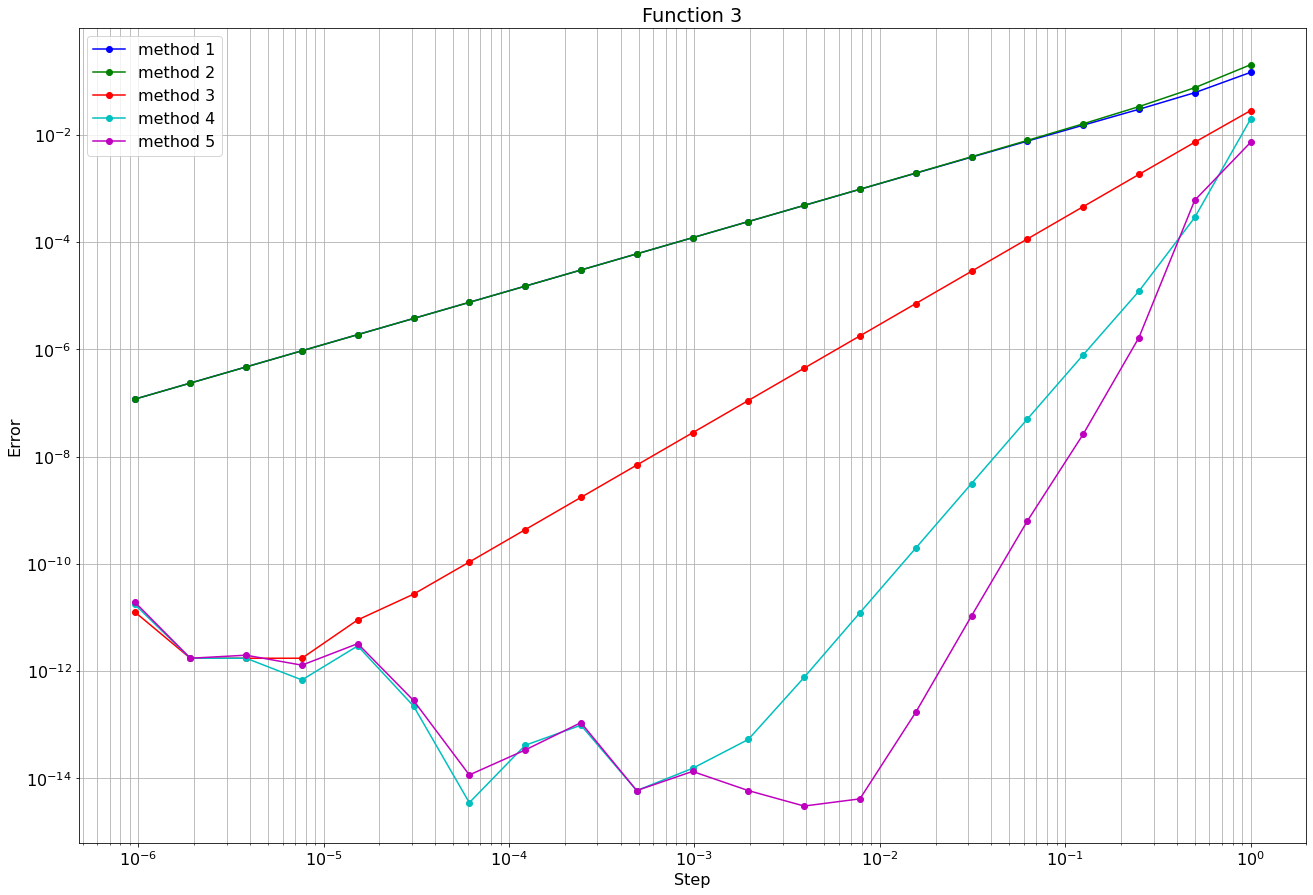

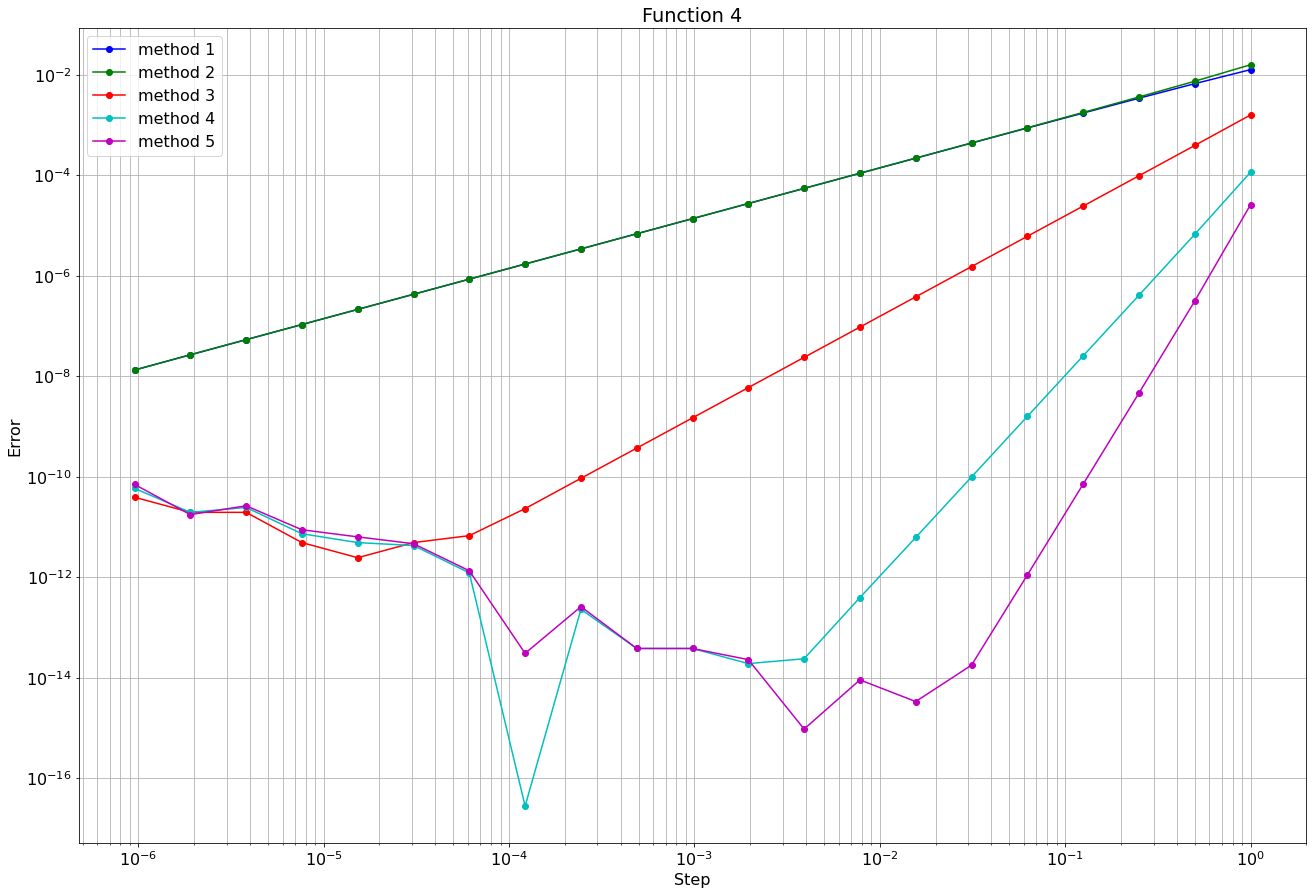

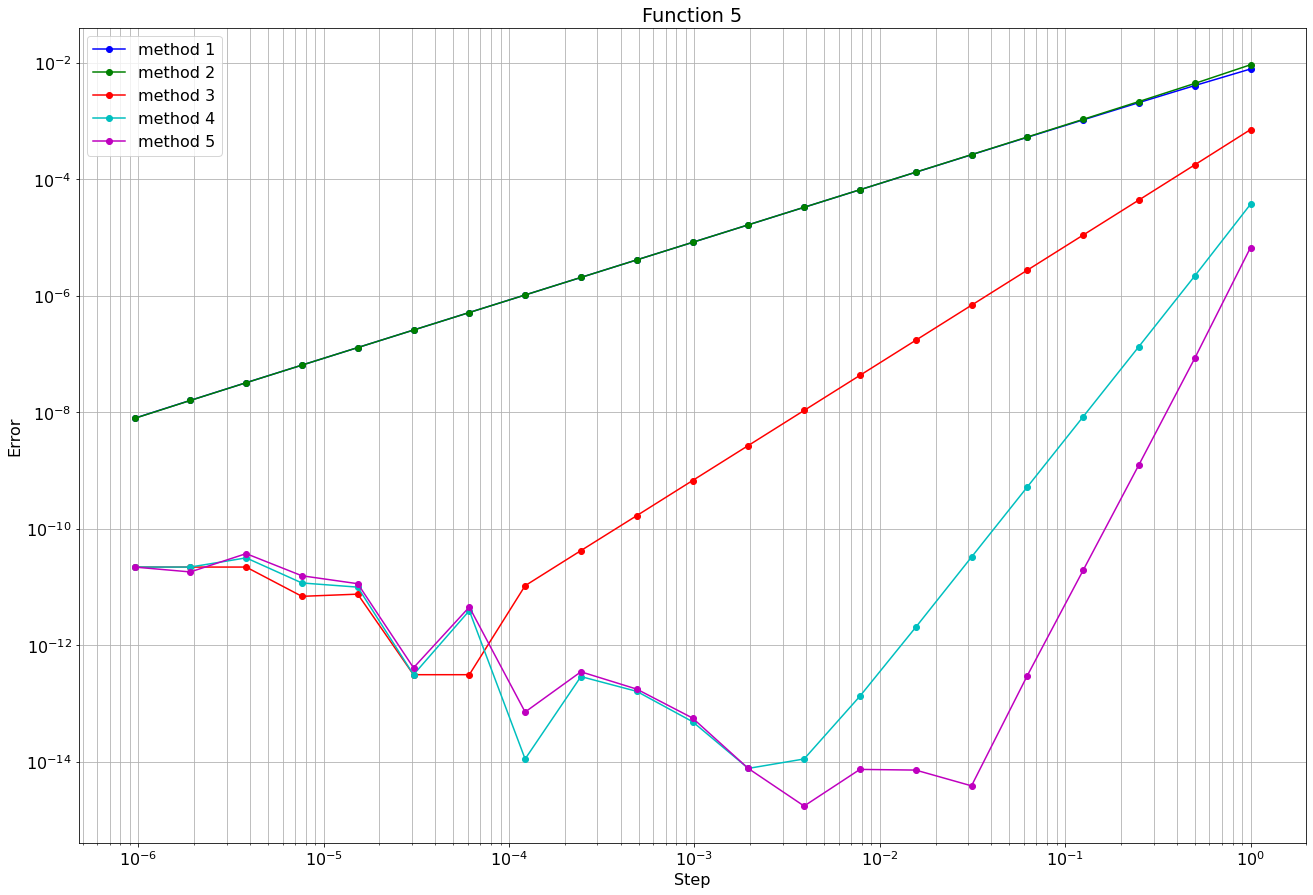

In [42]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#Prepare functions to calculate
f1 = lambda x: np.sin(x**2)
f2 = lambda x: np.cos(np.sin(x))
f3 = lambda x: np.exp(np.sin(np.cos(x)))
f4 = lambda x: np.log(x + 3)
f5 = lambda x: (x + 3)**0.5

f = [f1, f2, f3, f4, f5]

#Find derivative by hands
df1 = lambda x: 2. * x * np.cos(x**2)
df2 = lambda x: -np.sin(np.sin(x)) * np.cos(x)
df3 = lambda x: -np.exp(np.sin(np.cos(x))) * np.cos(np.cos(x)) * np.sin(x)
df4 = lambda x: 1. / (x + 3)
df5 = lambda x: 1. / (2 * ((x + 3)**0.5))

df = [df1, df2, df3, df4, df5]

n = 21 #times to calculate
dx = 1 / (2**np.arange(n)) #step
x0 = 3. #value to calculate

#Methods
method1 = lambda f, x, h : (f(x + h) - f(x)) / h
method2 = lambda f, x, h : (f(x) - f(x - h)) / h
method3 = lambda f, x, h : (f(x + h) - f(x - h)) / (2 * h)
method4 = lambda f, x, h : (2 * (f(x + h) - f(x - h))) / (3 * h) - (f(x + 2 * h) - f(x - 2 * h)) / (12 * h)
method5 = lambda f, x, h : (3 * (f(x + h) - f(x - h))) / (4 * h) - (3 * (f(x + 2 * h) - f(x - 2 * h))) / (20 * h) + (f(x + 3 * h) - f(x - 3 * h)) / (60 * h)
methods = [method1, method2, method3, method4, method5]

colors = ['bo-', 'go-', 'ro-', 'co-', 'mo-']

mpl.rcParams['font.size'] = 16 
for i in range(5):
    plt.figure(figsize=(22, 15))
    plt.grid(b=True, which='major', axis='both')
    plt.grid(b=True, which='minor', axis='both')
    for j in range(5):
        plt.loglog(dx, np.abs(methods[j](f[i], x0, dx) - (df[i])(x0)), colors[j], label = "method " + str(j + 1))    
    plt.title("Function " + str(i + 1))
    plt.ylabel("Error")
    plt.xlabel("Step")
    plt.legend()
    plt.show()